In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.spatial.distance import cdist
import random

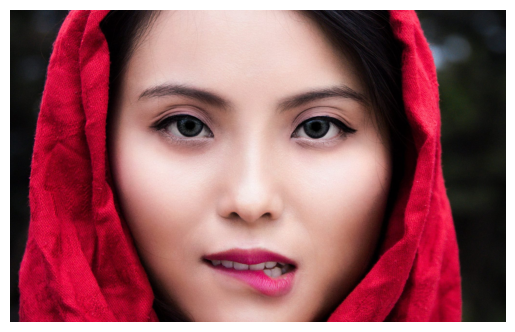

In [6]:
img = mpimg.imread("C:\\Users\\Admin\\minee\\MachineLearning\\K_means\\girl.jpg")
plt.imshow(img)
implot = plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
img.shape

(1289, 2048, 3)

In [9]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
X.shape

(2639872, 3)

In [11]:
# khởi tạo các tâm cụm ban đầu
def init_centroids(X,k):
    centroids_init = X[np.random.choice(X.shape[0],k, replace=False)]
    return centroids_init
# gán nhãn mới cho mỗi điểm của dữ liệu
def asign_new_labels(X, centroids):
    dist_X_centroids = cdist(X,centroids)
    new_labels = np.argmin(dist_X_centroids, axis=1)
    return new_labels
# cập nhật tâm cụm mới khi biết các nhãn
def update_centroids(X,labels,k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        Xk = X[labels==i,:]
        centroids[i,:] = np.mean(Xk, axis=0)
    return centroids
# điều kiện dừng
def has_converged(centroids, new_centroids):
    return set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids])

In [12]:
def kmeans(X,k):
    centroids_start = init_centroids(X,k)
    centroids_list = [centroids_start]
    labels=[]
    it = 0
    while True:
        labels_new = asign_new_labels(X, centroids_list[-1])
        labels.append(labels_new)
        centroids_new = update_centroids(X, labels_new, k)
        if has_converged(centroids_list[-1], centroids_new):
            break
        centroids_list.append(centroids_new)
        it+=1
        
    return centroids_list, labels, it
        

In [18]:
def kmeans_display(X,centroids, labels, k):
    img1 = np.zeros_like(X)
    for i in range(k):
        img1[labels==i] = centroids[i]
    
    img2 = img1.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img2, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [15]:
centroids_2k, labels_2k, it_2k = kmeans(X,k=2)
centroids_5k, labels_5k, it_5k = kmeans(X,k=5)
centroids_10k, labels_10k, it_10k = kmeans(X,k=10)
centroids_15k, labels_15k, it_15k = kmeans(X,k=15)
centroids_20k, labels_20k, it_20k = kmeans(X,k=20)

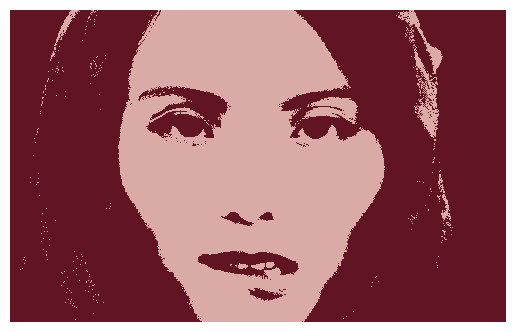

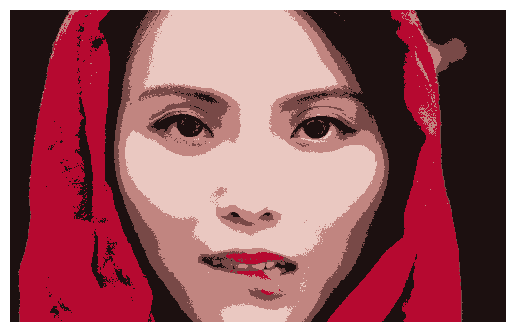

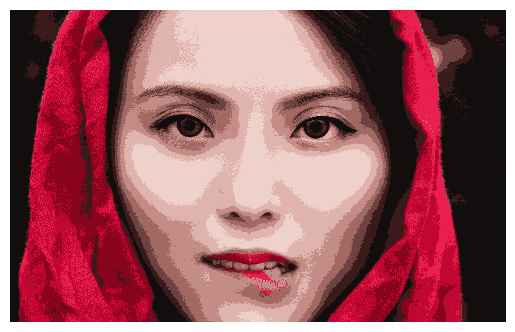

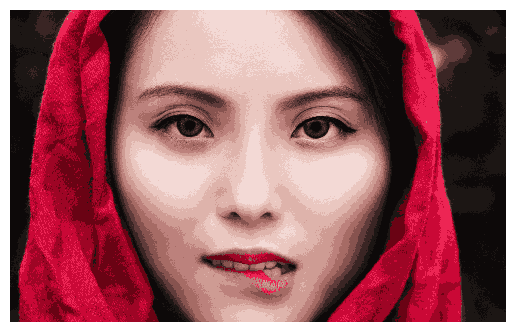

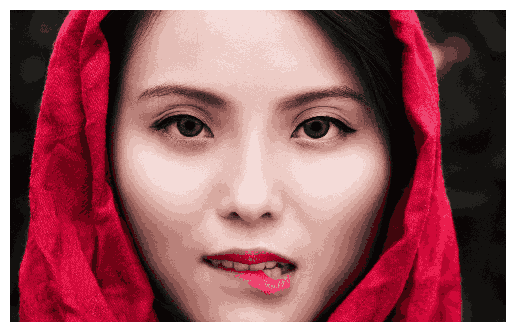

In [20]:
kmeans_display(X, centroids_2k[-1], labels_2k[-1], k=2)
kmeans_display(X, centroids_5k[-1], labels_5k[-1], k=5)
kmeans_display(X, centroids_10k[-1], labels_10k[-1], k=10)
kmeans_display(X, centroids_15k[-1], labels_15k[-1], k=15)
kmeans_display(X, centroids_20k[-1], labels_20k[-1], k=20)
